# Term Project: Data Preparation And Analysis For Washington D.C Properties
# Total Points: 60

## Instructions: 

1) Rename this .ipynb file with your first and last name (For Both Team members)

2) Complete the project info form

3) Answer all the questions

4) Upload this file into Canvas as your submisison file for the project

**Do not upload/push this file into your GitHub account**

** The CSV Dataset File 'DC_Properties.csv' is Eclosed with This .ipynb file **



# Complete the file info form:

Team Names Full Name1: Yuhe Wu

Team CSU ID1: 831683413

Date:2021/12/14


## Dataset Attribute Description

- BATHRM - Number of Full Bathrooms
- HF_BATHRM - Number of Half Bathrooms (no bathtub or shower)
- HEAT - Heating
- AC - Cooling
- NUM_UNITS - Number of Units
- ROOMS - Number of Rooms
- BEDRM - Number of Bedrooms
- AYB - The earliest time the main portion of the building was built
- YR_RMDL - Year structure was remodeled
- EYB - The year an improvement was built more recent than actual year built
- STORIES - Number of stories in primary dwelling
- SALEDATE - Date of most recent sale
- PRICE - Price of most recent sale
- QUALIFIED - Qualified
- SALE_NUM - Sale Number
- GBA - Gross building area in square feet
- BLDG_NUM - Building Number on Property
- STYLE - Structure style in regard to stories
- STRUCT - Structure type
- GRADE - Structural Grade
- CNDTN - Condition
- EXTWALL - Extrerior wall type
- ROOF - Roof type
- INTWALL - Interior wall
- KITCHENS - Number of kitchens
- FIREPLACES - Number of fireplaces
- USECODE - Property use code
- LANDAREA - Land area of property in square feet
- GIS_LAST_MOD_DTTM - Last Modified Date
- SOURCE - Raw Data Source
- CMPLX_NUM - Complex number
- LIVING_GBA - Gross building area in square feet
- FULLADDRESS - Full Street Address
- CITY - City
- STATE - State
- ZIPCODE - Zip Code
- NATIONALGRID - Address location national grid coordinate spatial address
- LATITUDE - Latitude
- LONGITUDE - Longitude
- ASSESSMENT_NBHD - Neighborhood ID
- ASSESSMENT_SUBNBHD - Subneighborhood ID
- CENSUS_TRACT - Census tract
- CENSUS_BLOCK - Census block
- WARD - Ward (District is divided into eight wards, each with approximately 75,000 residents)
- SQUARE - Square (from SSL)
- X - longitude
- Y - latitude
- QUADRANT - City quadrant (NE, SE, SW, NW)


In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# For time stamps
from datetime import datetime

# Optionally add any modules as you need

## Q1 (3 points): Read the Washington D.C property Dataset from file?

In [2]:
# Q1 Anaswer:
data = pd.read_csv('DC_Properties.csv')

## Q2 (17 Points): Data Exploration?
 - Find the otal number of observations (Rows) (3 pts)
 - Find the total number of variables (columns) (3 pts)
 - Find the number of numerical and none-numerical variables (6 pts)
 - Find the number of variables (columns) that include missing values (5 pts)
 
 ** One way to find out the number of observations/variables (columns) and the variables types is to use DataFrame.info() **

In [3]:
# Q2 Anaswers: (Add Cells as needed)
# number of observations and variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28900 non-null  int64  
 1   BATHRM              28900 non-null  int64  
 2   HF_BATHRM           28900 non-null  int64  
 3   HEAT                28900 non-null  object 
 4   AC                  28900 non-null  object 
 5   NUM_UNITS           28900 non-null  int64  
 6   ROOMS               28900 non-null  int64  
 7   BEDRM               28900 non-null  int64  
 8   AYB                 28900 non-null  int64  
 9   YR_RMDL             28900 non-null  int64  
 10  EYB                 28900 non-null  int64  
 11  STORIES             28900 non-null  float64
 12  SALEDATE            28900 non-null  object 
 13  PRICE               28891 non-null  float64
 14  QUALIFIED           28900 non-null  object 
 15  SALE_NUM            28900 non-null  int64  
 16  GBA 

In [4]:
# There are total of 28900 observations(Rows) and 47 variables(columns)

In [5]:
#number of numerical and non-numerical variables
from pandas.api.types import is_numeric_dtype

n=0

for c in data.columns:
    if is_numeric_dtype(data[c]):
        n+=1
        
print('numerical variables: ',n, 'none-numerical variables: ', len(data.columns)-n )

numerical variables:  25 none-numerical variables:  22


In [6]:
# number of variables (columns) that include missing values
data.isnull().sum()

Unnamed: 0            0
BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 9
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK    

In [7]:
# Only one variable has missing value. The variable name is PRICE and has 9 missing value.

## Q3 (20 Points): Preparing data for analytics?
- Handling all missing values in the data set by removing records with np.nan values. (5 pts)
- Remove the properties that have abnormal price. (5 pts)
- Remove all columns that have a constant value. (5 pts)
- Replace the column SALEDATE with the columns, SALEYEAR and SALEMONTH (5 pts) 

In [8]:
# Q3 Anaswers: (Add Cells as needed)
# remove missing value
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Unnamed: 0            0
BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK    

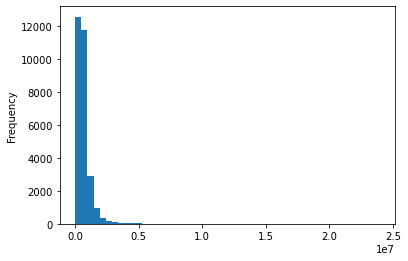

In [10]:
#abnormal price value
data['PRICE'].plot(kind='hist',bins=50)

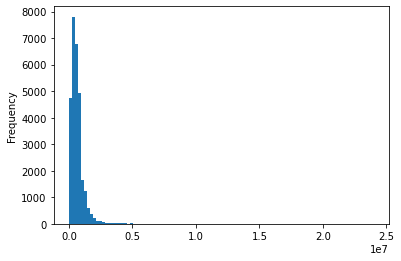

In [11]:
data['PRICE'].plot(kind='hist',bins=100)

In [12]:
data['PRICE'].min()

1.0

In [13]:
data['PRICE'].max()

23960287.0

In [14]:
data['PRICE'].sort_values(ascending=True).head(20)

28896       1.0
8174       10.0
16138     250.0
17936     250.0
17882     250.0
24198     250.0
15819     250.0
14323     250.0
28185     250.0
17622     500.0
1130      936.0
27885    1000.0
1496     1377.0
28152    4101.0
17898    5000.0
23254    5000.0
27048    5522.0
20956    5964.0
26344    7716.0
26993    9497.0
Name: PRICE, dtype: float64

In [15]:
# Remove extreme low values (values<1000)
data = data[data['PRICE']>=1000]

In [16]:
data['PRICE'].sort_values(ascending=True).head(20)

27885     1000.0
1496      1377.0
28152     4101.0
17898     5000.0
23254     5000.0
27048     5522.0
20956     5964.0
26344     7716.0
26993     9497.0
21765    10000.0
28812    11000.0
5623     12000.0
27626    12000.0
8425     12394.0
27135    14000.0
24683    14500.0
7884     15000.0
5804     15000.0
22071    15000.0
22107    15000.0
Name: PRICE, dtype: float64

In [17]:
data['PRICE'].min()

1000.0

In [18]:
data['PRICE'].max()

23960287.0

In [19]:
# Remove columns that have constant value
data.head(20)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2,8,4,1910,1988,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,4,3,1,Warm Cool,Y,2,7,3,1908,2008,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
6,6,3,1,Warm Cool,Y,1,8,3,1908,2006,...,-77.039844,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2,9,3,1908,2013,...,-77.040138,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Hot Water Rad,Y,1,14,5,1880,2009,...,-77.033774,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW
9,9,1,0,Forced Air,Y,1,6,3,1880,2010,...,-77.033925,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW
10,10,2,1,Forced Air,Y,1,5,3,1880,2010,...,-77.033972,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW


In [20]:
constant_columns=[]

for a in data.columns:
    n = len(data[a].unique())
    if n==1:
        constant_columns.append(a)
        
print('Constant Columns: ', constant_columns)

Constant Columns:  ['GIS_LAST_MOD_DTTM', 'SOURCE', 'CITY', 'STATE']


In [21]:
data.drop(columns=constant_columns,axis=1,inplace=True)
data

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2,8,4,1910,1988,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,4,3,1,Warm Cool,Y,2,7,3,1908,2008,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28894,28894,3,0,Forced Air,N,3,12,6,1954,2002,...,-77.007013,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28895,28895,3,0,Forced Air,N,3,13,8,1953,2016,...,-77.006996,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28897,28897,2,0,Forced Air,Y,2,10,4,1953,2017,...,-77.006034,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28898,28898,2,0,Forced Air,N,2,10,4,1953,2017,...,-77.006528,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW


In [22]:
# Replace the column SALEDATE with the columns, SALEYEAR and SALEMONTH
dateObject = pd.DatetimeIndex(data['SALEDATE'])
dateObject

DatetimeIndex(['2003-11-25', '2016-06-21', '2006-07-12', '2011-09-29',
               '2018-05-03', '2010-11-04', '2001-07-23', '2016-01-12',
               '2006-01-09', '2012-08-21',
               ...
               '2007-03-28', '2014-05-27', '2008-09-26', '2013-09-04',
               '2012-12-21', '2002-08-28', '2000-11-20', '2016-06-27',
               '2017-07-27', '2017-11-08'],
              dtype='datetime64[ns]', name='SALEDATE', length=28880, freq=None)

In [23]:
data['SALEYEAR']=dateObject.year
data['SALEMONTH']=dateObject.month
data['SALEDAY']=dateObject.day
data

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,SALEYEAR,SALEMONTH,SALEDAY
0,0,4,0,Warm Cool,Y,2,8,4,1910,1988,...,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2003,11,25
1,1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,...,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2016,6,21
2,2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,...,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2006,7,12
3,3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,...,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW,2011,9,29
4,4,3,1,Warm Cool,Y,2,7,3,1908,2008,...,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW,2018,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28894,28894,3,0,Forced Air,N,3,12,6,1954,2002,...,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW,2002,8,28
28895,28895,3,0,Forced Air,N,3,13,8,1953,2016,...,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW,2000,11,20
28897,28897,2,0,Forced Air,Y,2,10,4,1953,2017,...,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW,2016,6,27
28898,28898,2,0,Forced Air,N,2,10,4,1953,2017,...,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW,2017,7,27


In [24]:
data[['SALEDATE','SALEYEAR','SALEMONTH','SALEDAY']]

,SALEDATE,SALEYEAR,SALEMONTH,SALEDAY
0,11/25/2003,2003,11,25
1,6/21/2016,2016,6,21
2,7/12/2006,2006,7,12
3,9/29/2011,2011,9,29
4,5/3/2018,2018,5,3
...,...,...,...,...
28894,8/28/2002,2002,8,28
28895,11/20/2000,2000,11,20
28897,6/27/2016,2016,6,27
28898,7/27/2017,2017,7,27


## Q4 (20 Points). Use data visualization for data analysis
- Show the trend of average sale-price over years. (5 pts)
- Show the number of properties that have been sold over months. (5 pts)
- Show the sum of sale price for all 4 quadrant in Washington D.C. (5 pts)
- Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015. (5 pts)

In [25]:
# Q4 Anaswers: (Add Cells as needed)

In [26]:
# the trend of average sale-price over years
data[['SALEYEAR','PRICE']].groupby('SALEYEAR').mean()

,PRICE
SALEYEAR,
1986,89000.000000
1990,110000.000000
1991,189900.000000
1992,304614.492063
1993,265254.730539
1994,253537.211712
1995,245392.259091
1996,262525.955224
1997,303922.570513


Text(0, 0.5, 'Avg sale price')

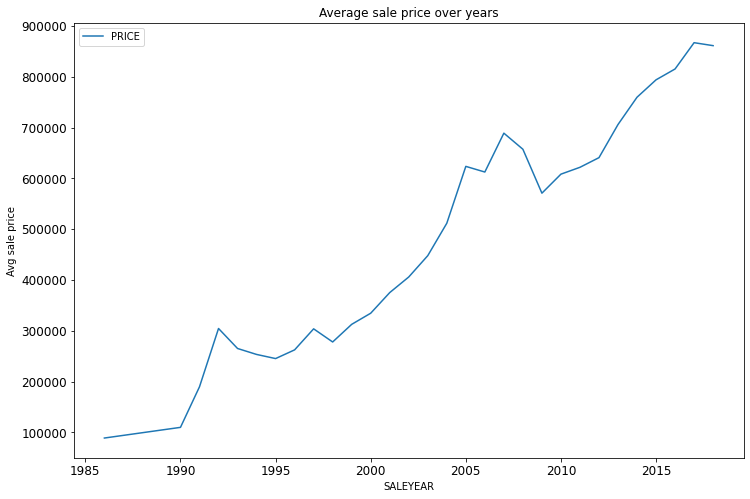

In [27]:
data[['SALEYEAR','PRICE']].groupby('SALEYEAR').mean().plot(figsize=(12,8),y='PRICE',
                                                   fontsize=12,title="Average sale price over years")
plt.ylabel('Avg sale price')

In [28]:
#Show the number of properties that have been sold over months.
data[['SALEMONTH','PRICE']].groupby('SALEMONTH').count()

,PRICE
SALEMONTH,
1,1946
2,1654
3,2321
4,2408
5,2787
6,3057
7,2851
8,2592
9,2239


Text(0, 0.5, 'Number of property sold')

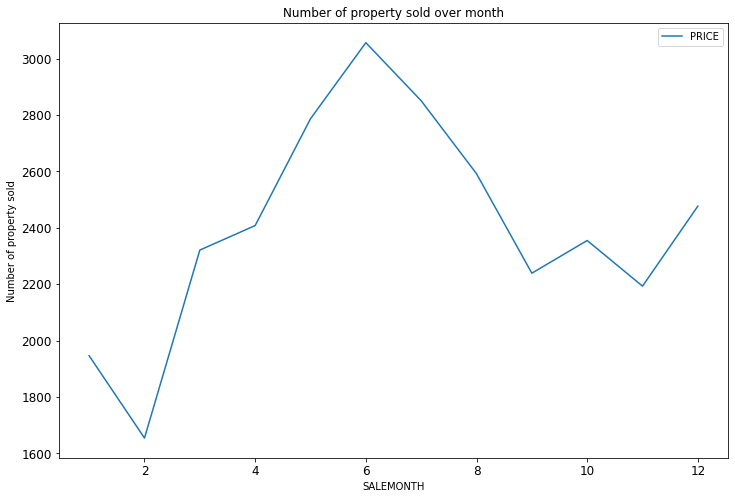

In [29]:
data[['SALEMONTH','PRICE']].groupby('SALEMONTH').count().plot(figsize=(12,8),y='PRICE',
                                                   fontsize=12,title="Number of property sold over month")
plt.ylabel('Number of property sold')

In [30]:
#Show the sum of sale price for all 4 quadrant in Washington D.C. 

In [31]:
data[['PRICE']] = data[['PRICE']] / 1000000
data['PRICE']

0        1.095
1        2.100
2        1.602
3        1.050
4        1.430
         ...  
28894    0.103
28895    0.118
28897    0.185
28898    0.215
28899    0.140
Name: PRICE, Length: 28880, dtype: float64

In [32]:
data[['QUADRANT','PRICE']].groupby('QUADRANT').sum()

,PRICE
QUADRANT,
NE,4290.775653
NW,11895.154585
SE,2673.207293
SW,59.979356


Text(0, 0.5, 'Sum of sale price (in millions)')

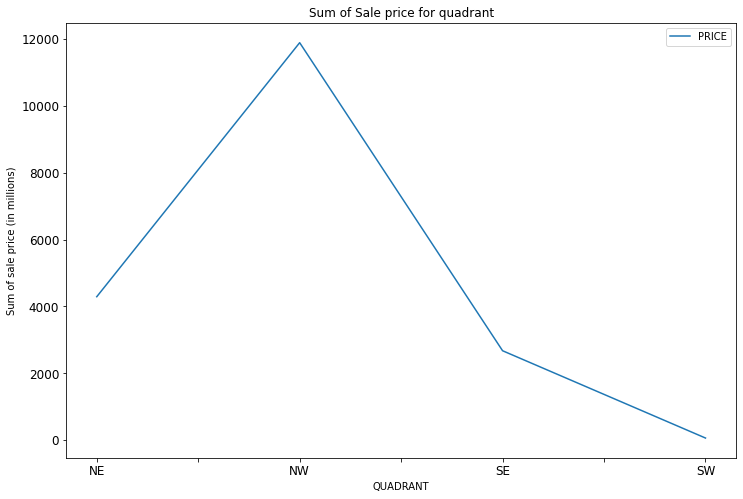

In [33]:
data[['QUADRANT','PRICE']].groupby('QUADRANT').sum().plot(figsize=(12,8),y='PRICE',
                                                   fontsize=12,title="Sum of Sale price for quadrant")
plt.ylabel('Sum of sale price (in millions)')

In [34]:
#Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015. 
filter1=data['SALEYEAR']==2015
filter1

0        False
1        False
2        False
3        False
4        False
         ...  
28894    False
28895    False
28897    False
28898    False
28899    False
Name: SALEYEAR, Length: 28880, dtype: bool

In [35]:
filter2=data['QUADRANT']=='NW'
filter2

0         True
1         True
2         True
3         True
4         True
         ...  
28894    False
28895    False
28897    False
28898    False
28899    False
Name: QUADRANT, Length: 28880, dtype: bool

In [36]:
result = data[filter1 & filter2]
result

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,SALEYEAR,SALEMONTH,SALEDAY
19,19,3,1,Forced Air,Y,2,9,4,1890,2009,...,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW,2015,9,16
45,45,4,1,Warm Cool,Y,2,8,4,1905,2008,...,4201,004201 1004,Ward 2,177,-77.037221,38.915033,NW,2015,11,30
68,68,3,1,Warm Cool,Y,1,9,4,1908,2015,...,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW,2015,4,22
72,72,4,1,Hot Water Rad,Y,2,9,4,1906,2007,...,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW,2015,8,24
73,73,2,0,Warm Cool,Y,1,6,3,1939,2004,...,4202,004202 1008,Ward 2,134,-77.042719,38.912019,NW,2015,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20375,20375,3,0,Forced Air,Y,1,8,3,1937,2014,...,2202,002202 1002,Ward 4,3402,-77.013210,38.950470,NW,2015,5,5
20424,20424,4,1,Forced Air,Y,1,8,3,1937,2012,...,2102,002102 3003,Ward 4,3395,-77.012627,38.955059,NW,2015,7,27
20487,20487,2,1,Forced Air,Y,1,9,3,1938,2015,...,2202,002202 1000,Ward 4,3404,-77.009298,38.951953,NW,2015,7,23
20639,20639,2,1,Hot Water Rad,N,1,8,4,1937,2015,...,2102,002102 2006,Ward 4,3405,-77.011334,38.954966,NW,2015,7,24


In [37]:
result[['FIREPLACES','PRICE']].groupby('FIREPLACES').mean()

,PRICE
FIREPLACES,
0,0.743883
1,0.999589
2,1.299620
3,2.327000
4,2.386562
5,2.674750
6,2.003500
7,2.900000
8,3.100000


Text(0, 0.5, 'Average sale price (in million)')

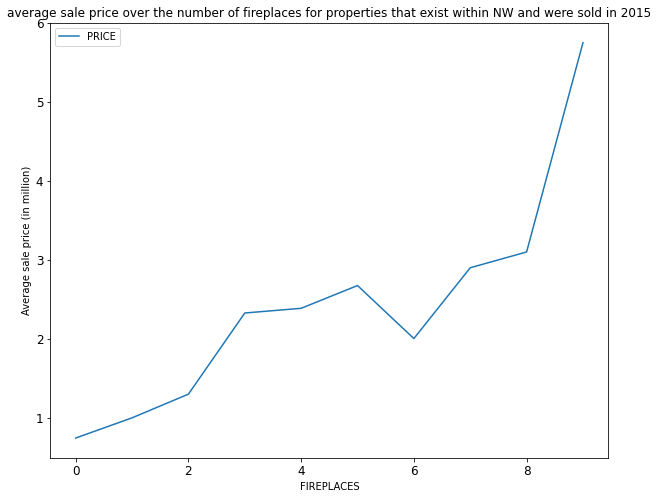

In [39]:
result[['FIREPLACES','PRICE']].groupby('FIREPLACES').mean().plot(figsize=(10,8),y='PRICE',
                               fontsize=12,
        title="average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015")

plt.ylabel("Average sale price (in million)")

## Good Luck!